In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
path = "data_files/"
cie_file = path + "all_1nm_data.xls"
macbeth_file = path + "ColorChecker_RGB_and_spectra.xls"
planilha = "spectral_data"
print(cie_file, "\n", macbeth_file)

data_files/all_1nm_data.xls 
 data_files/ColorChecker_RGB_and_spectra.xls


In [87]:
cie = pd.read_excel(cie_file, header = 3)
cie

,nm,CIE A,CIE D65,VM(l),V'(l),x bar,y bar,z bar,x bar.1,y bar.1,z bar.1
0,300,0.930483,0.03410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301,0.967643,0.36014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,302,1.005970,0.68618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,303,1.045490,1.01222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,304,1.086230,1.33826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
526,826,260.217000,59.16370,NaN,NaN,0.000002,5.980895e-07,0.0,0.000002,7.946400e-07,NaN
527,827,260.567000,59.45090,NaN,NaN,0.000002,5.575746e-07,0.0,0.000002,7.497800e-07,NaN
528,828,260.914000,59.73810,NaN,NaN,0.000001,5.198080e-07,0.0,0.000002,7.074400e-07,NaN
529,829,261.259000,60.02530,NaN,NaN,0.000001,4.846123e-07,0.0,0.000002,6.674800e-07,NaN


In [88]:
# passando do "dat frame" para numpy array

nm = cie["nm"].to_numpy(dtype=np.int)
Aw = cie["CIE A"].to_numpy(dtype=np.float32)
D65 = cie["CIE D65"].to_numpy(dtype=np.float32)
V = cie["VM(l)"].to_numpy(dtype=np.float32)
xbar = cie["x bar"].to_numpy(dtype=np.float32)
ybar = cie["y bar"].to_numpy(dtype=np.float32)
zbar = cie["z bar"].to_numpy(dtype=np.float32)

In [89]:
# selecionar a parte que interessa (lambda de 380 a 780)

Aw = Aw[(nm > 379) & (nm < 781)]
D65 = D65[(nm > 379) & (nm < 781)]
V = V[(nm > 379) & (nm < 781)]
xbar = xbar[(nm > 379) & (nm < 781)]
ybar = ybar[(nm > 379) & (nm < 781)]
zbar = zbar[(nm > 379) & (nm < 781)]

nm = nm[(nm > 379) & (nm < 781)]

In [90]:
Aw = Aw/np.amax(Aw)
D65 = D65/np.amax(D65)

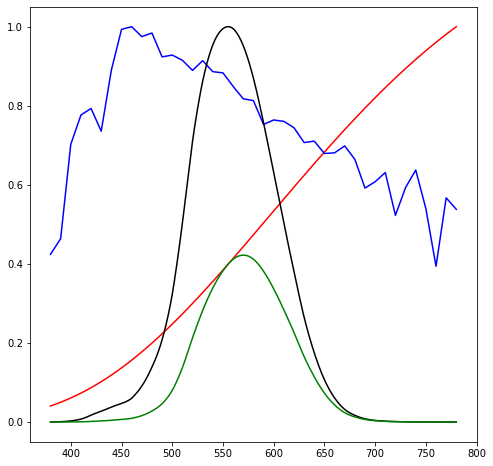

In [91]:
fig = plt.figure(figsize = (8, 8))

plt.plot(nm, Aw, 'red')
plt.plot(nm, D65, 'blue')
plt.plot(nm, V, 'black')
plt.plot(nm, V * Aw, 'green')
plt.show()

In [92]:
macbeth = pd.read_excel(macbeth_file, planilha, skiprows = 1, nrows = 24)
macbeth

,No.,Color name,380,390,400,410,420,430,440,450,...,640,650,660,670,680,690,700,710,720,730
0,1,dark skin,0.054928,0.058196,0.060952,0.062206,0.062053,0.061716,0.061316,0.060896,...,0.168002,0.178712,0.187641,0.190216,0.187565,0.184661,0.185506,0.191601,0.200459,0.213745
1,2,light skin,0.121190,0.148141,0.180052,0.196914,0.201313,0.203969,0.208183,0.215898,...,0.575687,0.593813,0.611101,0.622816,0.634289,0.650544,0.672105,0.692825,0.710127,0.727664
2,3,blue sky,0.140803,0.184342,0.253856,0.306988,0.324564,0.331075,0.334410,0.333286,...,0.141333,0.144916,0.149528,0.150637,0.147176,0.141332,0.134179,0.130998,0.133358,0.143824
3,4,foliage,0.050885,0.053654,0.055276,0.056408,0.057415,0.058832,0.060468,0.061553,...,0.106617,0.109036,0.110973,0.111131,0.110686,0.112285,0.116848,0.123456,0.129077,0.135007
4,5,blue flower,0.158202,0.208656,0.300129,0.379623,0.412229,0.424513,0.429127,0.428518,...,0.275969,0.310294,0.345441,0.364853,0.367350,0.363177,0.361778,0.367687,0.377500,0.394460
5,6,bluish green,0.145329,0.185461,0.249941,0.299415,0.323054,0.339699,0.357762,0.383281,...,0.192442,0.189729,0.192019,0.200311,0.212004,0.222958,0.231182,0.232753,0.229078,0.228957
6,7,orange,0.053094,0.052865,0.052598,0.053118,0.053421,0.053938,0.054314,0.054315,...,0.579200,0.578830,0.583909,0.594724,0.610798,0.628178,0.644308,0.652764,0.654096,0.659229
7,8,purplish blue,0.131629,0.171464,0.232881,0.289817,0.329289,0.361718,0.387262,0.398599,...,0.088127,0.095153,0.104810,0.116720,0.132619,0.155092,0.185937,0.218452,0.255486,0.296241
8,9,moderate red,0.098325,0.116366,0.131251,0.135560,0.134019,0.132384,0.131113,0.128977,...,0.586832,0.589435,0.591715,0.595030,0.600627,0.607360,0.613963,0.617000,0.616587,0.618122
9,10,purple,0.095340,0.118847,0.148021,0.172260,0.182266,0.176078,0.159757,0.139153,...,0.138652,0.161983,0.189353,0.220559,0.256014,0.295324,0.335884,0.369741,0.404354,0.445433


In [93]:
reflectance = macbeth.loc[:, macbeth.columns[2:]].to_numpy(dtype = np.float32)
colors = macbeth['Color name']
print(colors)

0                dark skin
1               light skin
2                 blue sky
3                  foliage
4              blue flower
5             bluish green
6                   orange
7            purplish blue
8             moderate red
9                   purple
10            yellow green
11           orange yellow
12                    blue
13                   green
14                     red
15                  yellow
16                 magenta
17                    cyan
18       white 9.5 (.05 D)
19       neutral 8 (.23 D)
20     neutral 6.5 (.44 D)
21       neutral 5 (.70 D)
22    neutral 3.5 (1.05 D)
23         black 2 (1.5 D)
Name: Color name, dtype: object


In [94]:
beta_green = reflectance[13,:]
beta_cyan = reflectance[17,:]

mask = (nm < 731) & (nm%10==0)

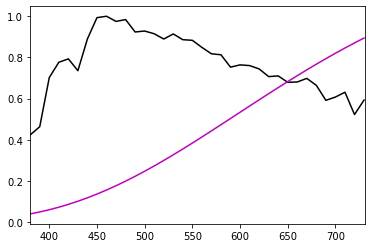

In [95]:
plt.plot(nm[mask], D65[mask], 'k')
plt.plot(nm[mask], Aw[mask], 'm')
plt.xlim(380, 731)
plt.show()

In [96]:
areaD65 = np.sum(D65)
areaAw = np.sum(Aw)
print(areaD65, areaAw)

299.09442 195.73885


In [97]:
lumD65 = np.sum(D65 * V)
lumAw = np.sum(Aw * V)
print(lumD65, lumAw)

ratioD65 = lumD65 / areaD65
ratioAw = lumAw / areaAw
print(ratioD65, ratioAw)

90.210594 44.70941
0.30161244 0.22841358


In [98]:
def beta2XYZ(Lw, beta, x_, y_, z_):
    k = 1/np.sum(Lw * y_)
    x = k * np.sum(Lw * beta * x_)
    y = k * np.sum(Lw * beta * y_)
    z = k * np.sum(Lw * beta * z_)
    
    return np.array([x, y, z])

XYZ_green = beta2XYZ(D65[mask], beta_green, xbar[mask], ybar[mask], zbar[mask])
print(XYZ_green)

[0.14531483 0.23340117 0.09790131]


In [99]:
import skimage.color as sc

In [100]:
Lab_green = sc.xyz2lab(XYZ_green, illuminant = 'D65', observer = '2')
print(Lab_green)

[ 55.42095702 -40.4905476   33.53996665]


In [101]:
sRGB_green = sc.xyz2rgb(XYZ_green)
#sRGB_green = sRGB_green * 255
print(sRGB_green)

[0.27909113 0.58478831 0.28054948]


In [102]:
beta = np.zeros(D65[mask].shape, dtype = np.float)
beta[0] = 1

XYZ = beta2XYZ(D65[mask], beta, xbar[mask], ybar[mask], zbar[mask])
print(XYZ)

[6.46936203e-05 1.84433553e-06 3.05024787e-04]


In [103]:
XYZ_cyan = beta2XYZ(D65[mask], beta_cyan, xbar[mask], ybar[mask], zbar[mask])
Lab_cyan = sc.xyz2lab(XYZ_cyan, illuminant = 'D65', observer = '2')
sRGB_cyan = sc.xyz2rgb(XYZ_cyan)
print(Lab_cyan, sRGB_cyan)

[ 51.6183847  -24.10756678 -25.70953849] [0.         0.53416594 0.65170428]


In [104]:
beta_spec = np.zeros(D65.shape, dtype = np.float)
beta_spec[0] = 1

XYZ_spec = np.zeros(shape = (D65.shape[0], 3), dtype = np.float)
sRGB_spec = np.zeros(shape = (D65.shape[0], 3), dtype = np.float)
for i in range(D65.shape[0]):
    beta = np.roll(beta_spec, i)
    XYZ_spec[i,:] = beta2XYZ(D65, beta, xbar, ybar, zbar)
    
    if (XYZ_spec[i,0] + XYZ_spec[i,1] + XYZ_spec[i,2]) > 0 :
        x = XYZ_spec[i,0] / (XYZ_spec[i,0] + XYZ_spec[i,1] + XYZ_spec[i,2])
        y = XYZ_spec[i,1] / (XYZ_spec[i,0] + XYZ_spec[i,1] + XYZ_spec[i,2])
        Y = 1
        X = x * (Y / y)
        Z = (1 - x - y) * (Y / y)
        
        sRGB_spec[i,:] = sc.xyz2rgb(np.array([X, Y, Z]))
    #print(sRGB_spec[i,:])


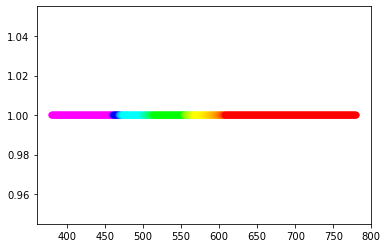

In [105]:
ones = np.ones(nm.shape, dtype = np.float)
plt.scatter(nm, ones, color = sRGB_spec)
plt.show()